In [1]:
# importing libraries and dependancies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('cooking_comments.csv',error_bad_lines=False
                        ,encoding='latin1'
                        
                        #, cyrillic encoding='latin1'
                       )
#pd.read_csv('commedy_comment.csv')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dopba\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data.head()

comment
0                where do you get this stuff so cool
1  6:50 is really good and useful. I didn't thoug...
2                            Where to buy this tools
3                              1:27 I like that idea
4                        The bird craves h e r o i n

In [3]:
data.shape

(5310, 1)

In [4]:
data = data.dropna()

In [5]:
data.shape

(5310, 1)

In [6]:
data.dtypes

comment    object
dtype: object

In [7]:
data['comment'].head()

0                  where do you get this stuff so cool
1    6:50 is really good and useful. I didn't thoug...
2                              Where to buy this tools
3                                1:27 I like that idea
4                          The bird craves h e r o i n
Name: comment, dtype: object

In [8]:
# calling the function
sia = SentimentIntensityAnalyzer()

In [9]:
data['negative'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neg'])
data['neutral'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['neu'])
data['positive'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['pos'])
data['compound'] = data['comment'].apply(lambda x : sia.polarity_scores(x)['compound'])

In [10]:
data.head()

comment  negative  neutral  \
0                where do you get this stuff so cool       0.0    0.701   
1  6:50 is really good and useful. I didn't thoug...       0.0    0.702   
2                            Where to buy this tools       0.0    1.000   
3                              1:27 I like that idea       0.0    0.545   
4                        The bird craves h e r o i n       0.0    1.000   

   positive  compound  
0     0.299    0.4572  
1     0.298    0.7474  
2     0.000    0.0000  
3     0.455    0.3612  
4     0.000    0.0000

In [11]:
# Counting the positive, negative and neutral reviews : 

positive_reviews = np.sum(i > 0.4 for i in data['compound'])
neutral_reviews = np.sum(-0.4 < i < 0.4 for i in data['compound'])
negative_reviews = np.sum(i < -0.4 for i in data['compound'])
n = len(data['compound'])

C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.
C:\Users\dopba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


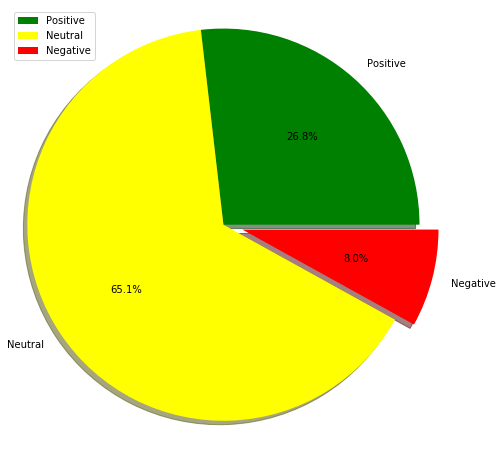

In [12]:

labels = 'Positive', 'Neutral', 'Negative'
sizes = [(positive_reviews * 100)/n, (neutral_reviews * 100)/n, (negative_reviews * 100)/n]
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize =(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)

plt.axis('equal') 
plt.legend()
plt.show()

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords = set(STOPWORDS)
text = " ".join(i for i in data['comment'])

In [15]:
print ("There are {} words in the combination of all reviews.".format(len(text)))

There are 227037 words in the combination of all reviews.


In [16]:
# Generating a wordcloud image: 
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=100).generate(text)

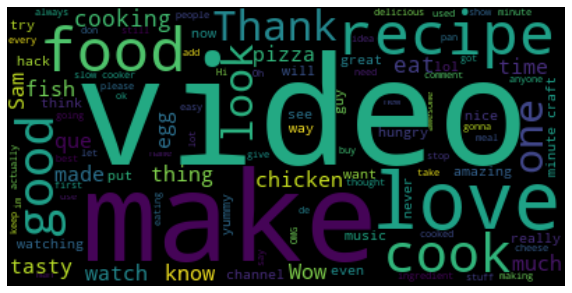

In [17]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()